In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
enc=LabelEncoder()
from sklearn.metrics import accuracy_score , classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [ ]:
df = pd.read_csv('/content/h1n1_vaccine_prediction.csv')
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [ ]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
df.shape

(26707, 34)

In [ ]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [ ]:
df.isna().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [ ]:
df.drop('unique_id',axis=1,inplace=True)

In [ ]:
df.skew()

<ipython-input-197-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


h1n1_worry                  -0.159913
h1n1_awareness              -0.239224
antiviral_medication         4.186503
contact_avoidance           -1.011306
bought_face_mask             3.401744
wash_hands_frequently       -1.716380
avoid_large_gatherings       0.589522
reduced_outside_home_cont    0.688227
avoid_touch_face            -0.758355
dr_recc_h1n1_vacc            1.349742
dr_recc_seasonal_vacc        0.724397
chronic_medic_condition      0.962097
cont_child_undr_6_mnths      3.033008
is_health_worker             2.462087
has_health_insur            -2.334909
is_h1n1_vacc_effective      -0.902706
is_h1n1_risky                0.672957
sick_from_h1n1_vacc          0.651281
is_seas_vacc_effective      -1.315177
is_seas_risky                0.250923
sick_from_seas_vacc          0.919587
no_of_adults                 0.786572
no_of_children               1.543903
h1n1_vaccine                 1.406022
dtype: float64

**FILLING** **THE** **MISSING** **VALUES**

In [ ]:
mean_value=df['h1n1_worry'].mean()
df['h1n1_worry'].fillna(value=mean_value,inplace=True)

In [ ]:
mean_value=df['h1n1_awareness'].mean()
df['h1n1_awareness'].fillna(value=mean_value,inplace=True)

In [ ]:
median_value=df['antiviral_medication'].median()
df['antiviral_medication'].fillna(value=median_value,inplace=True)

In [ ]:
median_value=df['contact_avoidance'].median()
df['contact_avoidance'].fillna(value=median_value,inplace=True)

In [ ]:
median_value=df['bought_face_mask'].median()
df['bought_face_mask'].fillna(value=median_value,inplace=True)

In [ ]:
median_value=df['wash_hands_frequently'].median()
df['wash_hands_frequently'].fillna(value=median_value,inplace=True)

In [ ]:
mean_value=df['avoid_large_gatherings'].mean()
df['avoid_large_gatherings'].fillna(value=mean_value,inplace=True)

In [ ]:
mean_value=df['reduced_outside_home_cont'].mean()
df['reduced_outside_home_cont'].fillna(value=mean_value,inplace=True)

In [ ]:
mean_value=df['avoid_touch_face'].mean()
df['avoid_touch_face'].fillna(value=mean_value,inplace=True)

In [ ]:
median_value=df['dr_recc_h1n1_vacc'].median()
df['dr_recc_h1n1_vacc'].fillna(value=median_value,inplace=True)

In [ ]:
mean_value=df['dr_recc_seasonal_vacc'].mean()
df['dr_recc_seasonal_vacc'].fillna(value=mean_value,inplace=True)

In [ ]:
mean_value=df['chronic_medic_condition'].mean()
df['chronic_medic_condition'].fillna(value=mean_value,inplace=True)

In [ ]:
median_value=df['cont_child_undr_6_mnths'].median()
df['cont_child_undr_6_mnths'].fillna(value=median_value,inplace=True)

In [ ]:
median_value=df['is_health_worker'].median()
df['is_health_worker'].fillna(value=median_value,inplace=True)

In [ ]:
median_value=df['has_health_insur'].median()
df['has_health_insur'].fillna(value=median_value,inplace=True)

In [ ]:
mean_value=df['is_h1n1_vacc_effective'].mean()
df['is_h1n1_vacc_effective'].fillna(value=mean_value,inplace=True)

In [ ]:
mean_value=df['is_h1n1_risky'].mean()
df['is_h1n1_risky'].fillna(value=mean_value,inplace=True)

In [ ]:
mean_value=df['sick_from_h1n1_vacc'].mean()
df['sick_from_h1n1_vacc'].fillna(value=mean_value,inplace=True)

In [ ]:
median_value=df['is_seas_vacc_effective'].median()
df['is_seas_vacc_effective'].fillna(value=median_value,inplace=True)

In [ ]:
mean_value=df['is_seas_risky'].mean()
df['is_seas_risky'].fillna(value=mean_value,inplace=True)

In [ ]:
mean_value=df['sick_from_seas_vacc'].mean()
df['sick_from_seas_vacc'].fillna(value=mean_value,inplace=True)

In [ ]:
mean_value=df['no_of_adults'].mean()
df['no_of_adults'].fillna(value=mean_value,inplace=True)

In [ ]:
median_value=df['no_of_children'].median()
df['no_of_children'].fillna(value=median_value,inplace=True)

In [ ]:
median_value=df['h1n1_vaccine'].median()
df['h1n1_vaccine'].fillna(value=median_value,inplace=True)

**CATEGORICAL**

In [ ]:
mode_value=df['age_bracket'].mode()[0]
df['age_bracket'].fillna(value=mode_value,inplace=True)

In [ ]:
mode_value=df['qualification'].mode()[0]
df['qualification'].fillna(value=mode_value,inplace=True)

In [ ]:
mode_value=df['race'].mode()[0]
df['race'].fillna(value=mode_value,inplace=True)

In [ ]:
mode_value=df['sex'].mode()[0]
df['sex'].fillna(value=mode_value,inplace=True)

In [ ]:
mode_value=df['income_level'].mode()[0]
df['income_level'].fillna(value=mode_value,inplace=True)

In [ ]:
mode_value=df['marital_status'].mode()[0]
df['marital_status'].fillna(value=mode_value,inplace=True)

In [ ]:
mode_value=df['housing_status'].mode()[0]
df['housing_status'].fillna(value=mode_value,inplace=True)

In [ ]:
mode_value=df['employment'].mode()[0]
df['employment'].fillna(value=mode_value,inplace=True)

In [ ]:
mode_value=df['census_msa'].mode()[0]
df['census_msa'].fillna(value=mode_value,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

In [ ]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [ ]:
df.shape

(26707, 33)

**X** **and** **Y**

In [ ]:
x=df.iloc[:,:-2]
y=df.iloc[:,-2:]

In [ ]:
x.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0


In [ ]:
y.head()

,no_of_children,h1n1_vaccine
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

**ENCODING THE OBJECT**

In [ ]:
x.age_bracket = enc.fit_transform(x.age_bracket)
x.qualification = enc.fit_transform(x.qualification)
x.race=enc.fit_transform(x.race)
x.sex = enc.fit_transform(x.sex)
x.income_level = enc.fit_transform(x.income_level)
x.marital_status = enc.fit_transform(x.marital_status)
x.housing_status = enc.fit_transform(x.housing_status)
x.employment = enc.fit_transform(x.employment)
x.census_msa = enc.fit_transform(x.census_msa)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

In [ ]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [ ]:
x.describe()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,1.618486,1.262532,0.048714,0.727749,0.068933,0.825888,0.358640,0.337315,0.677264,0.202494,...,2.186131,1.741117,2.570300,0.406223,0.456959,0.439735,0.222002,0.491894,0.833489,0.886499
std,0.908741,0.616805,0.215273,0.445127,0.253345,0.379213,0.478828,0.472076,0.466410,0.401866,...,1.457320,1.073989,0.923226,0.491136,0.670920,0.496364,0.415600,0.598964,0.823313,0.749901
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,4.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000


In [ ]:
y.describe()

,no_of_children,h1n1_vaccine
count,26707.000000,26707.000000
mean,0.529599,0.212454
std,0.925264,0.409052
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,3.000000,1.000000


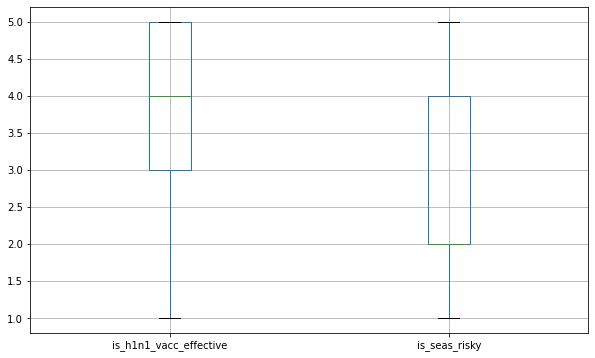

In [ ]:
fig = plt.figure(figsize =(10, 6))
boxplot=df.boxplot(column=['is_h1n1_vacc_effective','is_seas_risky'])

**OUTLIERS**

In [ ]:
def Outliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for i in column:
        if i>upper_limit or i<lower_limit:
            outliers.append(i)
    return np.array(outliers)

In [ ]:
print(len(Outliers(x.is_h1n1_vacc_effective)))
print(len(Outliers(x.is_seas_risky)))

0
0


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


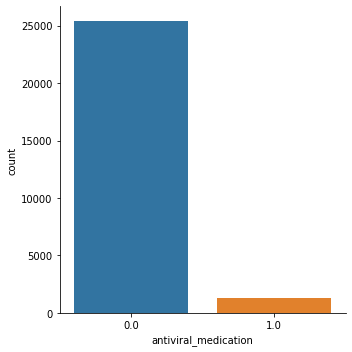

In [ ]:
sns.factorplot('antiviral_medication', data = x, kind = "count")

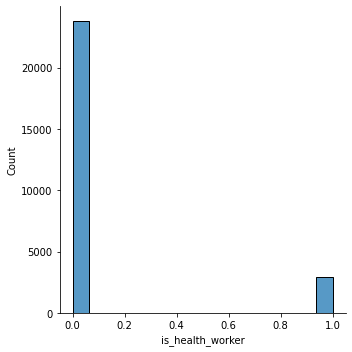

In [ ]:
sns.displot(x.is_health_worker)

array([[<AxesSubplot:title={'center':'h1n1_worry'}>,
        <AxesSubplot:title={'center':'h1n1_awareness'}>,
        <AxesSubplot:title={'center':'antiviral_medication'}>,
        <AxesSubplot:title={'center':'contact_avoidance'}>,
        <AxesSubplot:title={'center':'bought_face_mask'}>],
       [<AxesSubplot:title={'center':'wash_hands_frequently'}>,
        <AxesSubplot:title={'center':'avoid_large_gatherings'}>,
        <AxesSubplot:title={'center':'reduced_outside_home_cont'}>,
        <AxesSubplot:title={'center':'avoid_touch_face'}>,
        <AxesSubplot:title={'center':'dr_recc_h1n1_vacc'}>],
       [<AxesSubplot:title={'center':'dr_recc_seasonal_vacc'}>,
        <AxesSubplot:title={'center':'chronic_medic_condition'}>,
        <AxesSubplot:title={'center':'cont_child_undr_6_mnths'}>,
        <AxesSubplot:title={'center':'is_health_worker'}>,
        <AxesSubplot:title={'center':'has_health_insur'}>],
       [<AxesSubplot:title={'center':'is_h1n1_vacc_effective'}>,
        <A

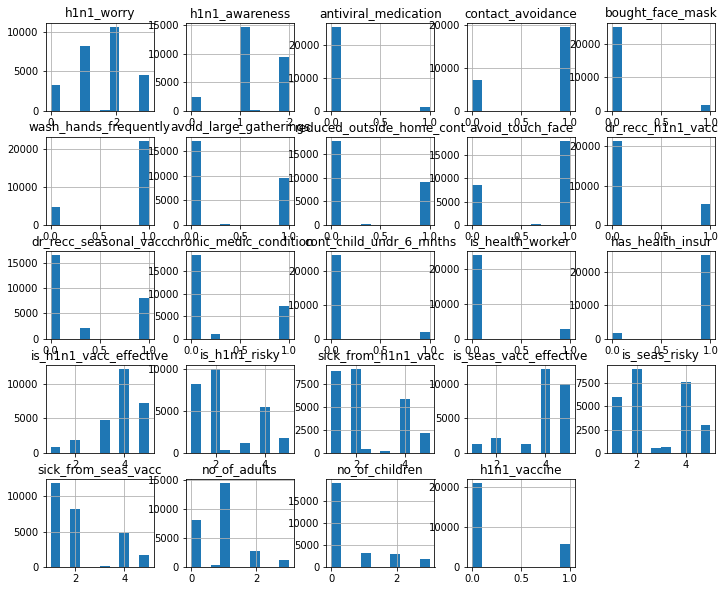

In [ ]:
df.hist(figsize = (12,10))

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=23)